
### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
### For that we need to build a multiple linear regression model for the prediction of car prices.

# 1. Reading and understanding data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',50)
%matplotlib inline

In [2]:
# Check the head of the dataset
df=pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df=df.drop(['car_ID'],axis=1) #dropping car id column as it is not required
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.isnull().sum() # find the sum of null values in all the columns

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

insight: There are no null values in any columns

### Finding Car company name from CarName column

In [8]:
# splitting car company name from CarName column
df['CarName']=df['CarName'].str.split(' ',expand=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df['CarName'].unique() #finding unique carname

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some company name which is spelled incorrectly<br>
      mazda = maxda <br>
      Nissan = nissan <br>
      porsche = porcshce <br>
      toyota = toyouta <br>
      vokswagen = volkswagen = vw <br>

In [10]:
#replacing incorrect company name by correct one
df['CarName']=df['CarName'].replace({'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','toyouta':'toyota','vw':'volkswagen','vokswagen':'volkswagen'})
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Categorizing symboling column<br>
Here Symboling is the assigned insurance risk rating,value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
Let's make the category clear by classifying based on risk:

-ve symboling as safe<br>
0, 1 as moderate<br>
2,3 as risky<br>

In [12]:
#using map function to assign category
df['symboling'] = df['symboling'].map({-2:'safe',-1:'safe',0:'moderate',1:'moderate',2:'risky',3:'risky'})

In [13]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,moderate,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,risky,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,risky,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
#finding the list of all the categorical values
categorical_variables=list(df.columns[df.dtypes=='object'])
categorical_variables

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

### EDA for detailed analysis

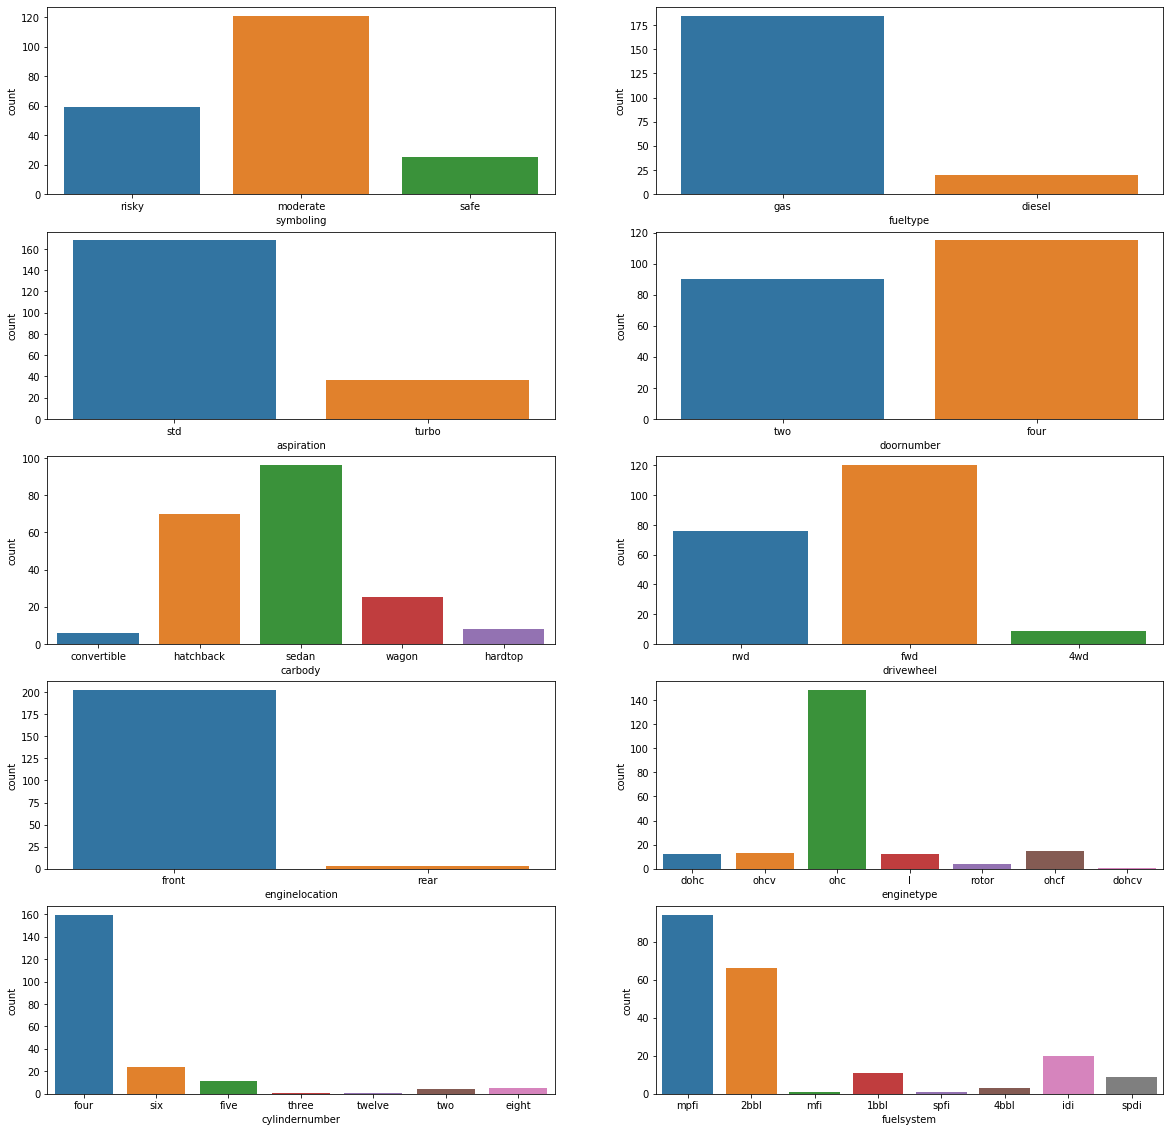

In [15]:
#Plots for all the categorical values
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.countplot('symboling',data=df)
plt.subplot(5,2,2)
sns.countplot('fueltype',data=df)
plt.subplot(5,2,3)
sns.countplot('aspiration',data=df)
plt.subplot(5,2,4)
sns.countplot('doornumber',data=df)
plt.subplot(5,2,5)
sns.countplot('carbody',data=df)
plt.subplot(5,2,6)
sns.countplot('drivewheel',data=df)
plt.subplot(5,2,7)
sns.countplot('enginelocation',data=df)
plt.subplot(5,2,8)
sns.countplot('enginetype',data=df)
plt.subplot(5,2,9)
sns.countplot('cylindernumber',data=df)
plt.subplot(5,2,10)
sns.countplot('fuelsystem',data=df)
plt.show()

insights : We can identify some of the car features that are predominant in the US Automobile Market.These features are:<br>

-symboling: moderate (0,1)<br>
-Carbody: Sedan<br>
-fueltype: gas<br>
-aspiration: standard<br>
-doornumbers: four<br>
-drivewheel: forward<br>
-engine location: front<br>
-engine type: ohc<br>
-cylinderNumber: four<br>
-fuelSystem: mpfi<br>

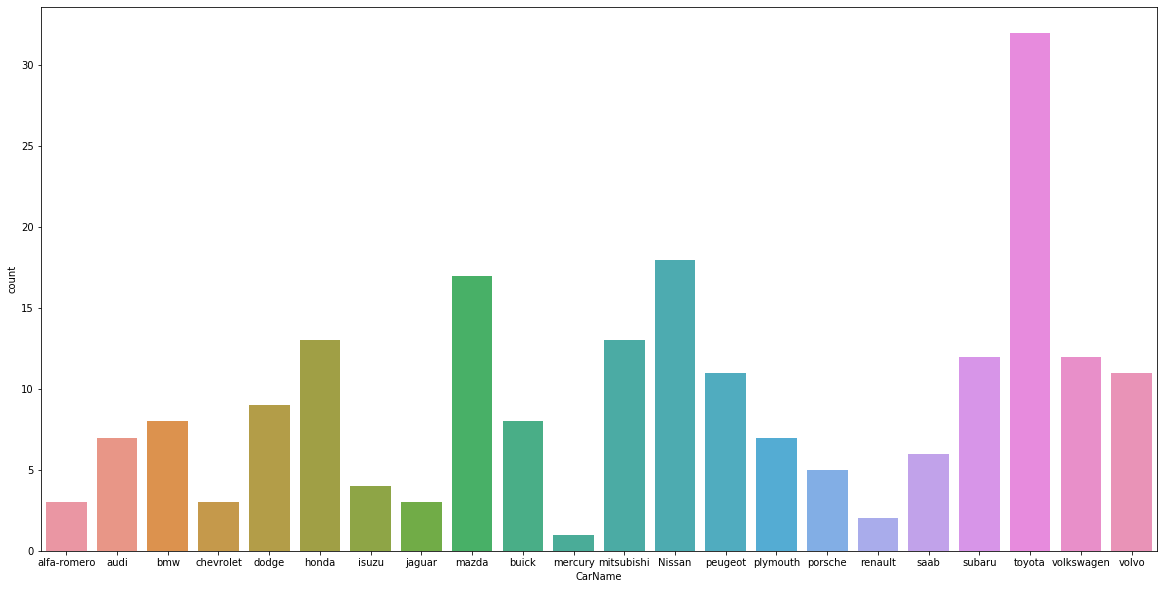

In [16]:
# plotting carname to find which company has maximum price
plt.figure(figsize=(20,10))
sns.countplot('CarName',data=df)
plt.show()

insight:From above graph it is clearly visible that Toyota has dominant market followed by Nissan and mazda.

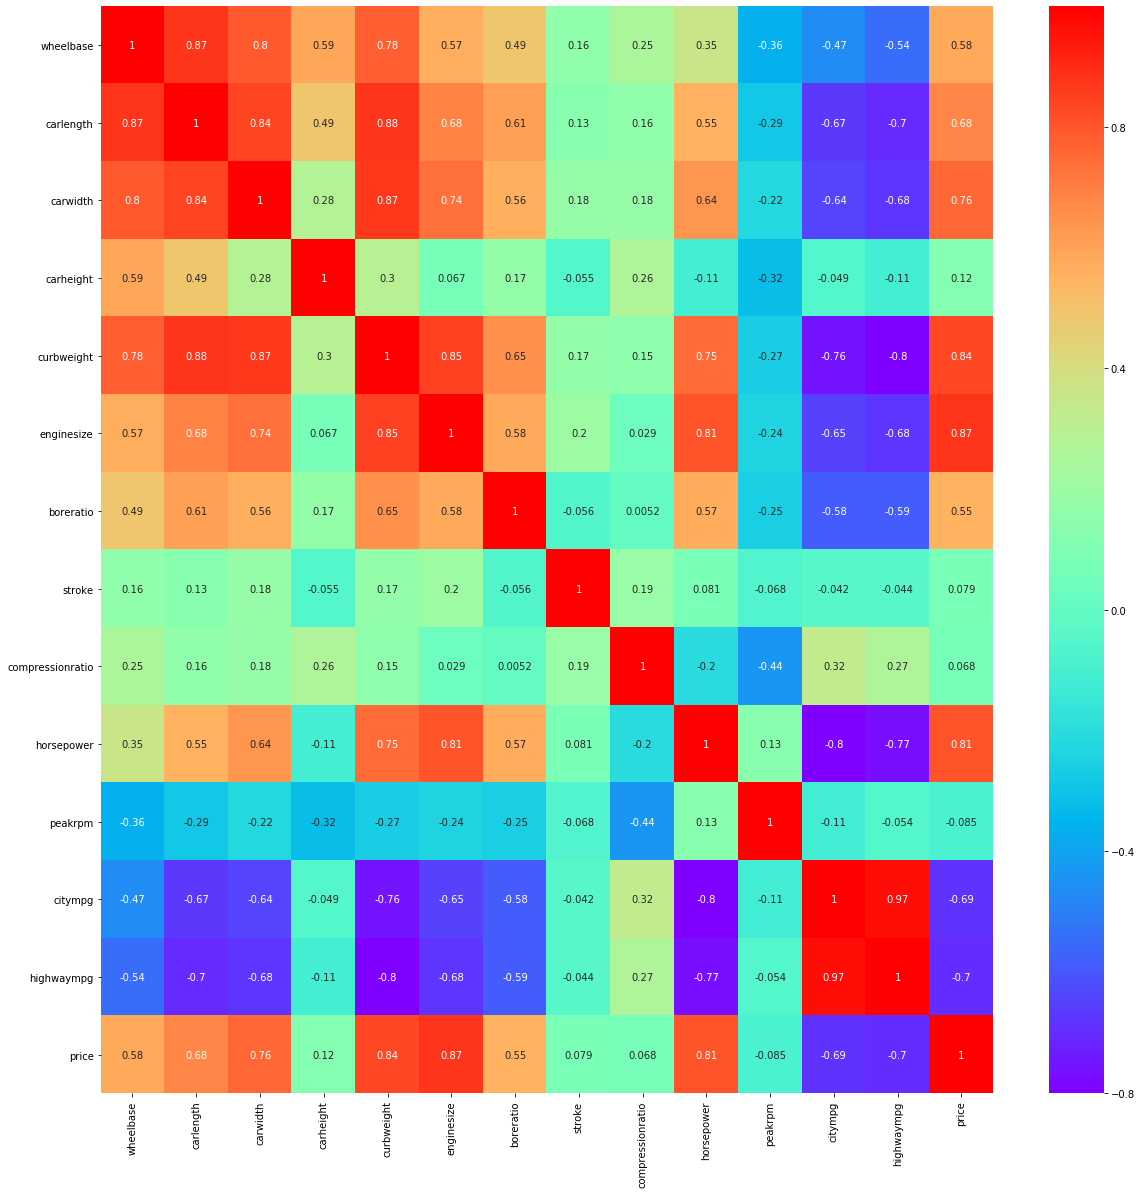

In [17]:
# Heat map to find correlation between diffrent numeric variables
plt.figure(figsize = (20, 20))
ax=sns.heatmap(df.corr(),annot=True,cmap="rainbow")
x,y=ax.get_ylim()
ax=ax.set_ylim(x+0.5,y-0.5)
plt.show()

insight : From above plot we can clearly see there are many varaibles which have good correlation with price like enginesize,horsepower,curbweight,carwidth.<br>
we can also observe some multicollinearity among varaibles like enginesize and horsepower,wheelbase and carlength,citympg and highwaympg etc

# 2. Visualising the data

### paiplot of all numeric values

In [18]:
numeric_values=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

<Figure size 3600x5760 with 0 Axes>

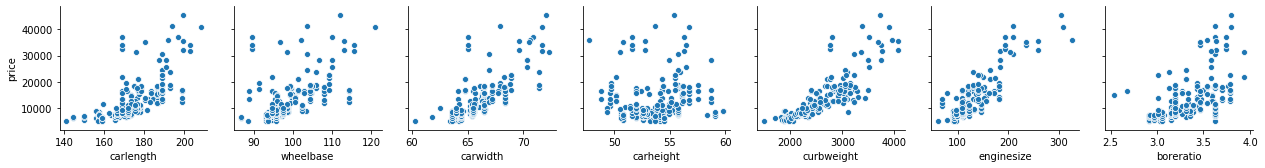

In [19]:
plt.figure(figsize=(50,80))
g=sns.pairplot(df,x_vars=["carlength","wheelbase","carwidth","carheight","curbweight","enginesize","boreratio",],y_vars=["price"])
plt.show()

<Figure size 3600x5760 with 0 Axes>

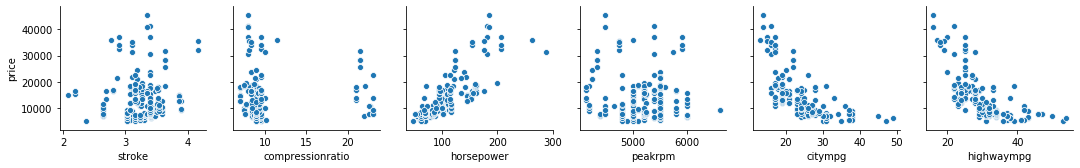

In [20]:
plt.figure(figsize=(50,80))
g=sns.pairplot(df,x_vars=["stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg"],y_vars=["price"])
plt.show()

We see enginesize, horsepower and compression ratio variables to have outliers .<br>
Enginesize,curbweight,horsepower has high positive correlation with price whereas citympg,highwaympg is negatively correlated with price

### outliers treatment

In [21]:
print(df[['horsepower','curbweight','enginesize']].quantile([0.01, .96])) #fining the percentile values
print(df[['compressionratio']].quantile([0.01, .90]))#fining the percentile values

      horsepower  curbweight  enginesize
0.01       52.12     1819.72        70.0
0.96      182.00     3657.80       209.0
      compressionratio
0.01              7.00
0.90             10.94


In [22]:
# treating Outilers in price of cars
df['horsepower'][np.abs(df['horsepower'] > 182.00)]= 182.00 # clippomg variables at 96 percentile
df['horsepower'][np.abs(df['horsepower'] > 3657.80)]= 3657.80 # clippomg variables at 96 percentile
df['enginesize'][np.abs(df['enginesize'] > 209.00)]= 209.00 # clippomg variables at  96 percentile
df['compressionratio'][np.abs(df['compressionratio'] > 10.94)]= 10.94 # clippomg variables at 90 percentile

### boxplot for all categorical values

In [23]:
categorical_values=['Symboling','carCompany','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

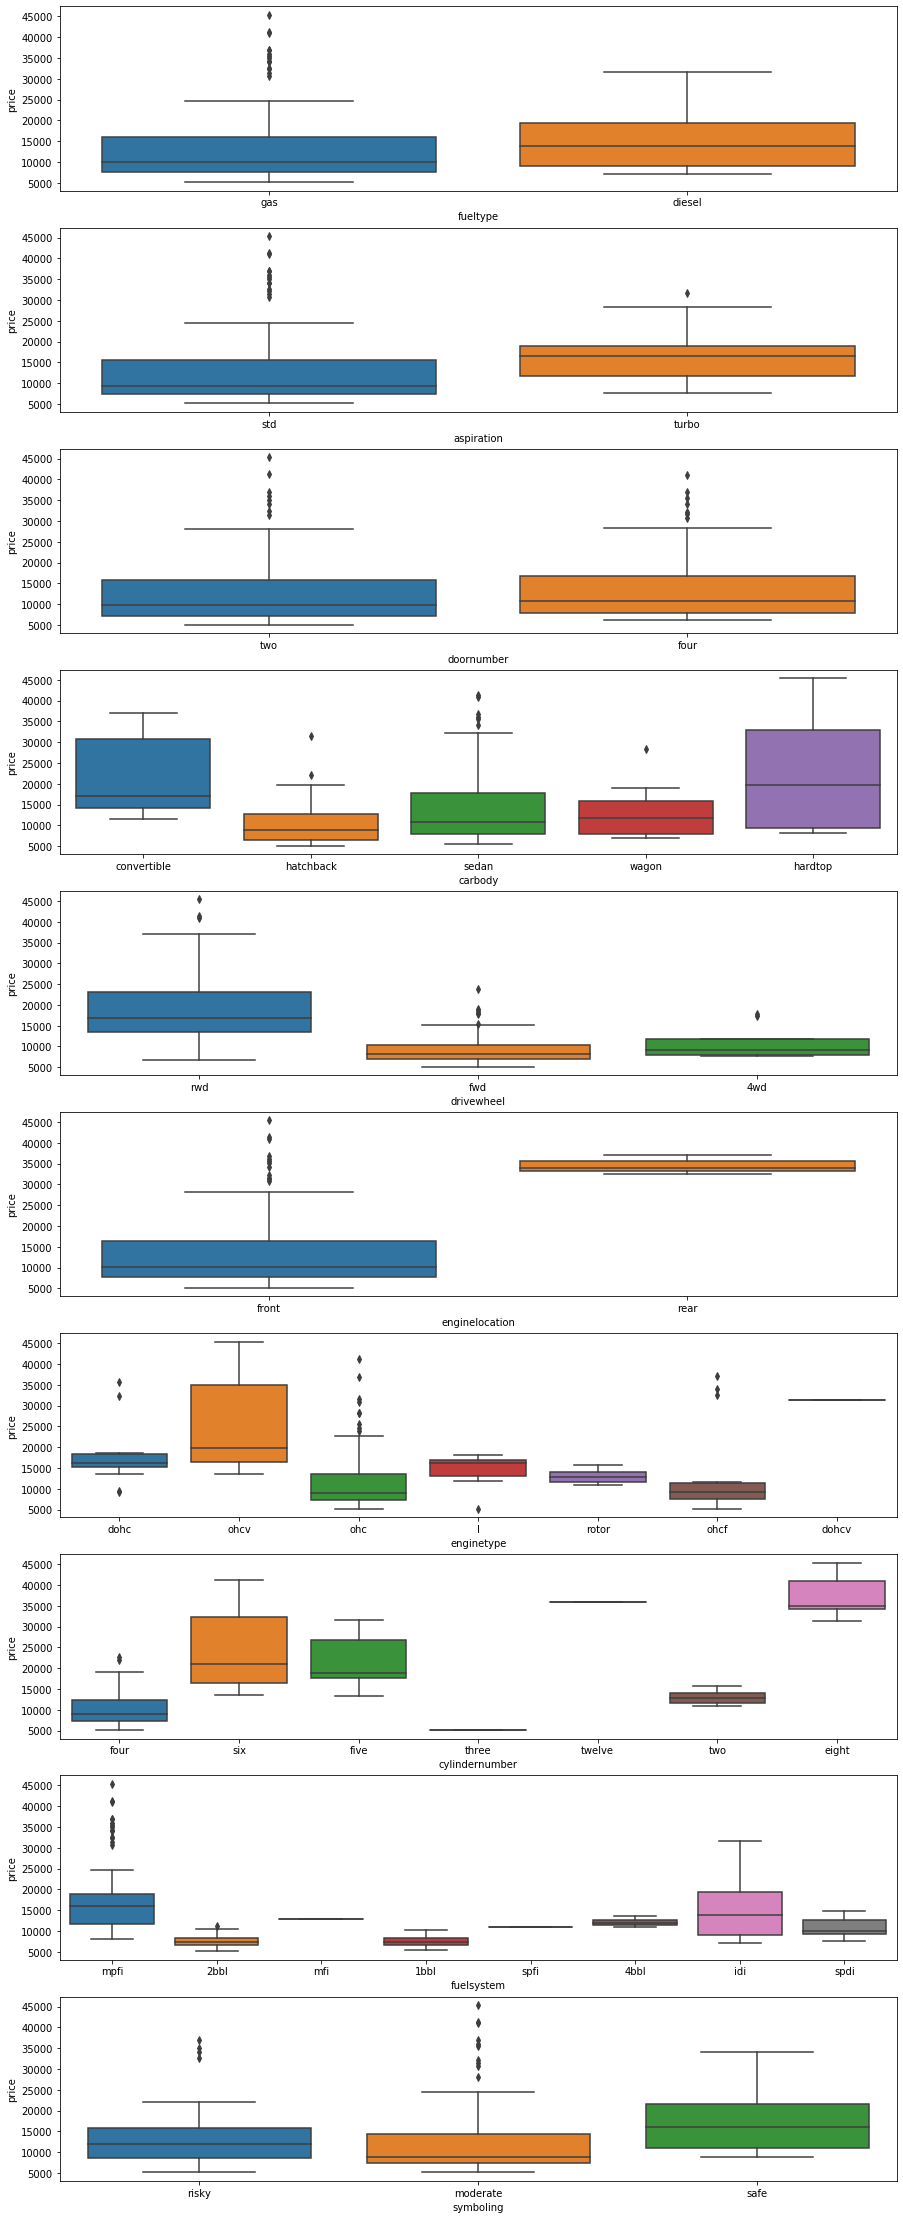

In [24]:
#plotting all categorical variables to see relation with price
plt.figure(figsize=(15,40))
plt.subplot(10,1,1)
sns.boxplot(x='fueltype',y='price',data=df)
plt.subplot(10,1,2)
sns.boxplot(x='aspiration',y='price',data=df)
plt.subplot(10,1,3)
sns.boxplot(x='doornumber',y='price',data=df)
plt.subplot(10,1,4)
sns.boxplot(x='carbody',y='price',data=df)
plt.subplot(10,1,5)
sns.boxplot(x='drivewheel',y='price',data=df)
plt.subplot(10,1,6)
sns.boxplot(x='enginelocation',y='price',data=df)
plt.subplot(10,1,7)
sns.boxplot(x='enginetype',y='price',data=df)
plt.subplot(10,1,8)
sns.boxplot(x='cylindernumber',y='price',data=df)
plt.subplot(10,1,9)
sns.boxplot(x='fuelsystem',y='price',data=df)
plt.subplot(10,1,10)
sns.boxplot(x='symboling',y='price',data=df)
plt.show()

Observations:
    
Although not significant but still the fuel type seems to have an effect on the pricing of the cars. <br>
Enginelocation (rear) and aspiration(turbo) has a visible effect on the pricing of the car.<br>
The price of real wheel drive is significantly higher that other drivewheel options.<br>
Cylindernumber and engine type also seem to regulate the price of cars.<br>
Hardtop and convertables cars are priced higher than other body types available. <br>

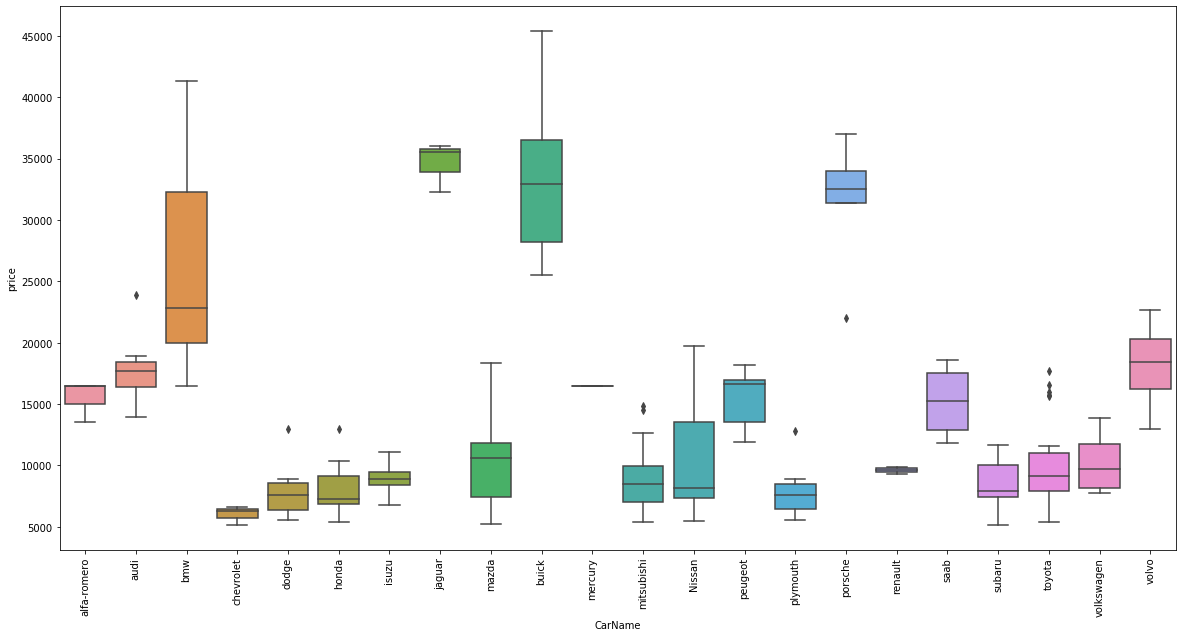

In [25]:
#plotting Carcompany with respect to price
plt.figure(figsize=(20,10))
sns.boxplot(x='CarName',y='price',data=df)
plt.xticks(rotation=90)
plt.show()

mean price for top companies:<br>
jaguar    :      34600.00<br>
buick     :     33647.00<br>
porsche   :     31400.50<br>
bmw       :    26118.75<br>
volvo     :     18063.18<br>

# 3. Data preparation


### Creating new variables(Derived metrics)
This will be helpful to remove correlated variables.<br>

Its observed that there is a high correlation between carlength, wheelbase, car width, car weight and city/highway mpg's.<br>
Lets create new variables from these to try reducing the multicolinearlity.<br>

In [26]:
# Creating new variable carLWratio
df['carLWratio'] = df.carlength/df.carwidth
# Creating new variable carWHratio
df['carWHratio'] = df.carwidth/df.carheight
# Creating new variable PWratio
df['PWratio'] = df.horsepower/df.curbweight
# Creating new variable HCmpgratio
df['HCmpgratio'] = df.highwaympg/df.citympg
## droping the orignal variables
df.drop(['carlength','carwidth','carheight','highwaympg','citympg'],axis=1,inplace=True)

Since we saw that the company brand value is determinig the pricing of the car.
So We will segment the car companies based on the mean company price as:

lower if company mean price is below 10,000<br>
mid if company mean price is above 10,000 and below 20,000<br>
higher if company mean price is above 20,000<br>

In [27]:
#finding mean price with respect to car company name
df.groupby(['CarName']).price.mean().sort_values(ascending=False)

CarName
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
Nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

In [28]:
#segment car comapnies based on mean price range
company_segment_dict = {
    'cheverolet' : 'lower',
    'dodge' : 'lower',
    'plymouth' : 'lower',
    'honda' : 'lower',
    'subaru' : 'lower',
    'isuzu' : 'lower',
    'mitsubishi' : 'lower',
    'renault' : 'lower',
    'toyota' : 'lower',
    'volkswagen' : 'mid',
    'nissan' : 'mid',
    'mazda' : 'mid',
    'saab' : 'mid',
    'peugeot' : 'mid',
    'alfa-romero' : 'mid',
    'mercury' : 'mid',
    'audi' : 'mid',
    'volvo' : 'mid',
    'bmw' : 'higher',
    'buick' : 'higher',
    'porsche' : 'higher',
    'jaguar' : 'higher',
    }
df['company_segment'] = df['CarName'].map(company_segment_dict)
# Dropping the orignal carName variable
df.drop('CarName',axis=1,inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,mid
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,mid
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,mid
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,mid
4,risky,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,mid


In [29]:
df.groupby('company_segment').price.mean()

company_segment
higher    30788.687500
lower      8987.369565
mid       13977.296574
Name: price, dtype: float64

### creating dummy variables for all categorical variables

In [30]:
# unique values for fueltype
print("unique values in fueltype")
print(df['fueltype'].unique())
print('\n')

# unique values for aspiration
print("Unique values in aspiration")
print(df['aspiration'].unique())

print('\n')

# unique values for doornumber
print("Unique values in doornumber")
print(df['doornumber'].unique())

print('\n')

# unique values for carbody
print("Unique values in carbody")
print(df['carbody'].unique())

print('\n')

# unique values for drivewheel
print("Unique values in drivewheel")
print(df['drivewheel'].unique())

print('\n')

# unique values for enginelocation
print("Unique values in enginelocation")
print(df['enginelocation'].unique())

print('\n')

# unique values for enginetype
print("Unique values in enginetype")
print(df['enginetype'].unique())

print('\n')

# unique values for cylindernumber
print("Unique values in cylindernumber")
print(df['cylindernumber'].unique())

print('\n')

# unique values for fuelsystem
print("Unique values in fuelsystem")
print(df['fuelsystem'].unique())

unique values in fueltype
['gas' 'diesel']


Unique values in aspiration
['std' 'turbo']


Unique values in doornumber
['two' 'four']


Unique values in carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Unique values in drivewheel
['rwd' 'fwd' '4wd']


Unique values in enginelocation
['front' 'rear']


Unique values in enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


Unique values in cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


Unique values in fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [31]:
#creating dummy variables
status=pd.get_dummies(df[['company_segment','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','fueltype','aspiration','doornumber','enginelocation','symboling']],drop_first=True)
status.head()

,company_segment_lower,company_segment_mid,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear,symboling_risky,symboling_safe
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [32]:
df=pd.concat([df,status],axis=1) #adding all dummy variavles with original dataset
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment,company_segment_lower,...,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear,symboling_risky,symboling_safe
0,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,mid,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
1,risky,gas,std,two,convertible,rwd,front,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,mid,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,moderate,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,mid,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,risky,gas,std,four,sedan,fwd,front,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,mid,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,risky,gas,std,four,sedan,4wd,front,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,mid,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [33]:
#dropping variables whose dummy has already been created as those colums will not be required
df=df.drop(['company_segment','carbody','drivewheel','enginetype','cylindernumber','fuelsystem','fueltype','aspiration','doornumber','enginelocation','symboling'],axis=1)
df.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment_lower,company_segment_mid,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear,symboling_risky,symboling_safe
0,88.6,2548,130,3.47,2.68,9.0,111,5000,13495.0,2.633385,1.313525,0.043564,1.285714,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
1,88.6,2548,130,3.47,2.68,9.0,111,5000,16500.0,2.633385,1.313525,0.043564,1.285714,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
2,94.5,2823,152,2.68,3.47,9.0,154,5000,16500.0,2.613740,1.250000,0.054552,1.368421,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,99.8,2337,109,3.19,3.40,10.0,102,5500,13950.0,2.667674,1.219153,0.043646,1.250000,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,99.4,2824,136,3.19,3.40,8.0,115,5500,17450.0,2.659639,1.222836,0.040722,1.222222,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [34]:
df.shape

(205, 46)

# 4. splitting the data into training and test set

#### the first basic step for regression is performing a train-test split.

In [35]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

###### Rescaling the Features using min_max scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler=MinMaxScaler()

In [38]:
varlist=['price','peakrpm','horsepower','compressionratio','stroke','boreratio','enginesize','curbweight','wheelbase','carLWratio','carWHratio','PWratio','HCmpgratio']

In [39]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[varlist]=scaler.fit_transform(df_train[varlist])

In [40]:
df_train.head()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment_lower,company_segment_mid,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear,symboling_risky,symboling_safe
122,0.244828,0.272692,0.250000,0.230159,0.525253,0.609137,0.149254,0.551020,0.068818,0.557140,0.448461,0.240778,0.348974,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
125,0.272414,0.500388,0.608108,1.000000,0.464646,0.634518,0.708955,0.551020,0.466890,0.325594,0.709540,0.684139,0.650718,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
166,0.272414,0.314973,0.250000,0.444444,0.449495,0.609137,0.477612,1.000000,0.122110,0.578350,0.350729,0.623833,0.178322,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
1,0.068966,0.411171,0.466216,0.626984,0.247475,0.507614,0.470149,0.346939,0.314446,0.574393,0.592205,0.512513,0.441558,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
199,0.610345,0.647401,0.466216,0.746032,0.484848,0.126904,0.850746,0.387755,0.382131,0.847483,0.230896,0.680639,0.454545,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1


In [41]:
df_train.describe()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment_lower,company_segment_mid,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear,symboling_risky,symboling_safe
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.407878,0.419628,0.497946,0.535389,0.522843,0.395157,0.400029,0.219310,0.571441,0.387705,0.418810,0.355073,0.447552,0.314685,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.909091,0.181818,0.440559,0.006993,0.244755,0.104895
std,0.205581,0.211269,0.236266,0.207140,0.157843,0.220555,0.257240,0.196438,0.215682,0.194278,0.153936,0.168350,0.139367,0.498989,0.466023,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.288490,0.387050,0.498199,0.083624,0.431453,0.307495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.245539,0.243243,0.305556,0.464646,0.406091,0.164179,0.265306,0.067298,0.474597,0.291396,0.310739,0.275974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.355702,0.331081,0.500000,0.545455,0.507614,0.343284,0.428571,0.140343,0.578350,0.365962,0.382528,0.348974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.559542,0.540541,0.682540,0.611111,0.609137,0.507463,0.551020,0.313479,0.701553,0.460845,0.513027,0.412121,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.00000

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated
df_train.corr()

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carLWratio,carWHratio,PWratio,HCmpgratio,company_segment_lower,company_segment_mid,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear,symboling_risky,symboling_safe
wheelbase,1.000000,0.792815,0.615244,0.482386,0.224970,0.115522,0.444184,-0.347757,0.622591,0.764387,0.023432,-0.033623,-0.007928,-0.361421,0.270354,-0.103235,-0.371606,0.333352,0.162160,-0.499023,0.538721,-0.001739,0.406623,-0.222195,-0.135755,0.108535,-0.092032,0.288842,-0.367809,0.283534,-0.142992,0.049113,-0.092032,-0.438523,-0.079417,0.393481,NaN,0.338923,-0.117645,NaN,-0.393481,0.277414,-0.462232,-0.127454,-0.287488,0.498441
curbweight,0.792815,1.000000,0.875685,0.625759,0.209277,0.003271,0.794267,-0.278156,0.861860,0.724346,0.352860,0.307621,0.270883,-0.406811,0.187031,-0.015781,-0.294072,0.162677,0.145206,-0.691805,0.687311,0.127791,0.237870,-0.412737,-0.100522,0.370775,-0.040089,0.273471,-0.593859,0.455979,-0.162583,0.218088,-0.040089,-0.593771,-0.042573,0.288561,NaN,0.526508,-0.027766,NaN,-0.288561,0.325634,-0.251023,0.033473,-0.048664,0.359323
enginesize,0.615244,0.875685,1.000000,0.587525,0.251755,-0.011739,0.832021,-0.280852,0.867249,0.570651,0.423698,0.456963,0.314741,-0.351425,-0.029266,0.094783,-0.234325,0.183999,-0.033697,-0.550527,0.609719,0.192414,0.045498,-0.317324,-0.076913,0.469439,-0.246364,0.204166,-0.628323,0.621412,-0.149569,0.206864,-0.246364,-0.517758,-0.223096,0.186837,NaN,0.536593,-0.010640,NaN,-0.186837,0.159884,-0.105754,0.170739,-0.008249,0.314657
boreratio,0.482386,0.625759,0.587525,1.000000,-0.152836,0.017192,0.520042,-0.287938,0.533591,0.542076,0.249493,0.239065,0.305225,-0.254925,0.127750,0.110272,-0.244359,0.117691,0.093406,-0.517488,0.507992,0.204110,0.214048,-0.473985,0.375397,0.074544,0.014733,-0.000743,-0.138491,0.110833,-0.128229,0.075047,0.014733,-0.359207,0.012713,0.153727,NaN,0.399859,-0.036809,NaN,-0.153727,0.186639,-0.183979,0.139578,0.128863,0.228918
stroke,0.224970,0.209277,0.251755,-0.152836,1.000000,-0.008899,0.163497,-0.017408,0.152820,0.101219,0.146969,0.067460,0.076712,-0.077421,0.006617,-0.009434,0.086892,0.083866,-0.165469,0.095763,0.022908,-0.037743,-0.033344,0.384066,-0.594501,-0.080499,0.002685,0.191336,-0.153683,0.136186,-0.059299,-0.132053,0.002685,-0.292108,0.002317,0.265493,NaN,-0.041584,0.214983,NaN,-0.265493,0.199580,0.014726,-0.094329,-0.031986,0.106911
compressionratio,0.115522,0.003271,-0.011739,0.017192,-0.008899,1.000000,-0.291667,-0.265789,0.017788,-0.003269,-0.100202,-0.469267,-0.270607,-0.180110,0.063124,0.057476,-0.108560,0.115781,-0.008565,-0.079275,0.184591,0.091095,0.130353,-0.029562,-0.061748,-0.046555,0.066606,0.002660,-0.005163,-0.068995,0.042640,0.182190,0.066606,0.072990,0.057476,0.686544,NaN,-0.333952,-0.409231,NaN,-0.686544,-0.129814,-0.108660,0.042640,-0.114388,0.143897
horsepower,0.444184,0.794267,0.832021,0.520042,0.163497,-0.291667,1.000000,0.095771,0.813265,0.469713,0.564914,0.814790,0.537428,-0.315615,0.051381,0.091124,-0.060313,0.042530,-0.054622,-0.575021,0.601733,0.198009,-0.041546,-0.432343,-0.049499,0.433779,0.042220,0.172224,-0.685124,0.609937,-0.129363,0.198009,0.042220,-0.617574,0.000209,-0.100818,NaN,0.679123,0.122149,NaN,0.100818,0.269342,0.064417,0.198009,0.164648,0.227049
peakrpm,-0.347757,-0.278156,-0.280852,-0.287938,-0.017408,-0.265789,0.095771,1.000000,-0.127431,-0.323805,0.203192,0.427717,0.292706,0.054998,0.021880,0.051868,0.237387,-0.160433,-0.106163,0.154246,-0.120889,0.108475,-0.232402,0.056617,-0.145193,-0.022253,0.307708,-0.007243,-0.047859

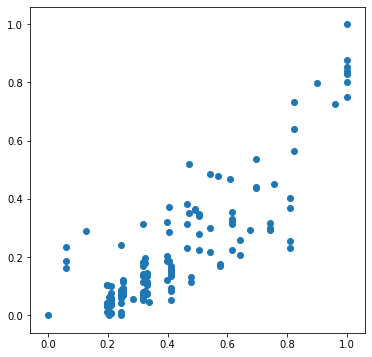

In [43]:
# from above correlation enginesize seems to be correlated to price the most. Let's see a pairplot for area vs price.
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

### Dividing into x and y sets for the model building

In [44]:
y_train=df_train.pop('price')
x_train=df_train

#  5. Building a linear model

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
#Running RFE with output numnber of varibales 15
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

In [47]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', False, 21),
 ('enginesize', True, 1),
 ('boreratio', False, 2),
 ('stroke', True, 1),
 ('compressionratio', False, 25),
 ('horsepower', True, 1),
 ('peakrpm', False, 7),
 ('carLWratio', True, 1),
 ('carWHratio', True, 1),
 ('PWratio', True, 1),
 ('HCmpgratio', False, 10),
 ('company_segment_lower', False, 4),
 ('company_segment_mid', False, 19),
 ('carbody_hardtop', False, 15),
 ('carbody_hatchback', False, 16),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 17),
 ('drivewheel_fwd', False, 28),
 ('drivewheel_rwd', False, 14),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 9),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 3),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 5),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 6),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 8),
 ('fuelsystem_2bb

In [48]:
col=x_train.columns[rfe.support_]
col

Index(['wheelbase', 'enginesize', 'stroke', 'horsepower', 'carLWratio',
       'carWHratio', 'PWratio', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'enginelocation_rear'],
      dtype='object')

In [49]:
x_train.columns[~rfe.support_]

Index(['curbweight', 'boreratio', 'compressionratio', 'peakrpm', 'HCmpgratio',
       'company_segment_lower', 'company_segment_mid', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'symboling_risky',
       'symboling_safe'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [50]:
x_train_rfe=x_train[col]
x_train_rfe.head()

,wheelbase,enginesize,stroke,horsepower,carLWratio,carWHratio,PWratio,enginetype_dohcv,enginetype_ohc,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,enginelocation_rear
122,0.244828,0.250000,0.525253,0.149254,0.557140,0.448461,0.240778,0,1,0,0,1,0,0,0
125,0.272414,0.608108,0.464646,0.708955,0.325594,0.709540,0.684139,0,1,0,0,1,0,0,0
166,0.272414,0.250000,0.449495,0.477612,0.578350,0.350729,0.623833,0,0,0,0,1,0,0,0
1,0.068966,0.466216,0.247475,0.470149,0.574393,0.592205,0.512513,0,0,0,0,1,0,0,0
199,0.610345,0.466216,0.484848,0.850746,0.847483,0.230896,0.680639,0,1,0,0,1,0,0,0


In [51]:
import statsmodels.api as sm

Fit a regression line through the training data using `statsmodels`.
In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [52]:
# Add a constant
x_train_rfe=sm.add_constant(x_train_rfe)

In [53]:
# Create a first fitted model
lr=sm.OLS(y_train,x_train_rfe).fit()

In [54]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     88.29
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           1.48e-59
Time:                        01:16:09   Log-Likelihood:                 191.13
No. Observations:                 143   AIC:                            -350.3
Df Residuals:                     127   BIC:                            -302.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [55]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i)for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,107.12
4,horsepower,33.37
7,PWratio,14.26
2,enginesize,10.55
12,cylindernumber_four,6.48
13,cylindernumber_six,5.44
1,wheelbase,4.33
5,carLWratio,3.68
11,cylindernumber_five,3.22
6,carWHratio,2.49


In [57]:
x_train_new=x_train_rfe.drop(['cylindernumber_twelve'],axis=1) # dropping enginetype_rotor because it has very high p value

In [58]:
import statsmodels.api as sm 
x_train_new=sm.add_constant(x_train_new)
# Create a second fitted model
lr1=sm.OLS(y_train,x_train_new).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     94.56
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           2.40e-60
Time:                        01:16:09   Log-Likelihood:                 190.59
No. Observations:                 143   AIC:                            -351.2
Df Residuals:                     128   BIC:                            -306.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2844    

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=x_train_new.columns
vif['VIF']=[variance_inflation_factor(x_train_new.values,i)for i in range(x_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,105.02
4,horsepower,32.56
7,PWratio,13.76
2,enginesize,10.54
12,cylindernumber_four,6.29
13,cylindernumber_six,5.08
1,wheelbase,4.30
5,carLWratio,3.68
11,cylindernumber_five,3.06
6,carWHratio,2.37


In [60]:
x_train_new1=x_train_new.drop(['carWHratio'],axis=1) #dropping because of high p value

In [61]:
x_train_new1=sm.add_constant(x_train_new1)
# Create a third fitted model
lr2=sm.OLS(y_train,x_train_new1).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           3.88e-61
Time:                        01:16:10   Log-Likelihood:                 190.01
No. Observations:                 143   AIC:                            -352.0
Df Residuals:                     129   BIC:                            -310.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3107    

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=x_train_new1.columns
vif['VIF']=[variance_inflation_factor(x_train_new1.values,i)for i in range(x_train_new1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,83.87
4,horsepower,32.09
6,PWratio,13.74
2,enginesize,10.09
11,cylindernumber_four,5.88
12,cylindernumber_six,4.40
1,wheelbase,4.24
5,carLWratio,3.37
10,cylindernumber_five,2.93
8,enginetype_ohc,2.19


In [63]:
x_train_new2=x_train_new1.drop(['horsepower'],axis=1)#dropping beacuse of high VIF

In [64]:
x_train_new2=sm.add_constant(x_train_new2)
# Create a fourth fitted model
lr3=sm.OLS(y_train,x_train_new2).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     82.84
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           8.40e-55
Time:                        01:16:12   Log-Likelihood:                 171.19
No. Observations:                 143   AIC:                            -316.4
Df Residuals:                     130   BIC:                            -277.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1374    

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=x_train_new2.columns
vif['VIF']=[variance_inflation_factor(x_train_new2.values,i)for i in range(x_train_new2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,59.56
10,cylindernumber_four,5.22
2,enginesize,4.92
11,cylindernumber_six,3.95
1,wheelbase,3.87
4,carLWratio,2.98
9,cylindernumber_five,2.86
7,enginetype_ohc,2.07
8,enginetype_ohcv,2.01
5,PWratio,1.89


In [66]:
x_train_new3=x_train_new2.drop(['carLWratio'],axis=1)#dropping because of high p value

In [67]:
x_train_new3=sm.add_constant(x_train_new3)
# Create a fifth fitted model
lr4=sm.OLS(y_train,x_train_new3).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.13
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           1.56e-55
Time:                        01:16:14   Log-Likelihood:                 170.53
No. Observations:                 143   AIC:                            -317.1
Df Residuals:                     131   BIC:                            -281.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1210    

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=x_train_new3.columns
vif['VIF']=[variance_inflation_factor(x_train_new3.values,i)for i in range(x_train_new3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif                                                                                                                                                                       

,Features,VIF
0,const,54.15
9,cylindernumber_four,5.19
2,enginesize,4.61
10,cylindernumber_six,3.93
8,cylindernumber_five,2.86
1,wheelbase,2.71
6,enginetype_ohc,2.06
7,enginetype_ohcv,1.96
4,PWratio,1.89
3,stroke,1.57


In [69]:
x_train_new4=x_train_new3.drop(['enginetype_dohcv'],axis=1)# dropping p value greater than 0.05

In [70]:
x_train_new4=sm.add_constant(x_train_new4)
# Create a sixth fitted model
lr5=sm.OLS(y_train,x_train_new4).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     97.38
Date:                Sat, 15 Aug 2020   Prob (F-statistic):           6.59e-56
Time:                        01:16:15   Log-Likelihood:                 168.93
No. Observations:                 143   AIC:                            -315.9
Df Residuals:                     132   BIC:                            -283.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1040    

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=x_train_new4.columns
vif['VIF']=[variance_inflation_factor(x_train_new4.values,i)for i in range(x_train_new4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif 

,Features,VIF
0,const,51.78
8,cylindernumber_four,4.64
2,enginesize,3.95
9,cylindernumber_six,3.35
7,cylindernumber_five,2.61
1,wheelbase,2.59
5,enginetype_ohc,2.06
4,PWratio,1.88
6,enginetype_ohcv,1.77
3,stroke,1.55


In [72]:
x_train_new5=x_train_new4.drop(['const'],axis=1) #dropping constant

# 6. Residual Analysis of the train data

In [73]:
y_train_price=lr5.predict(x_train_new4)


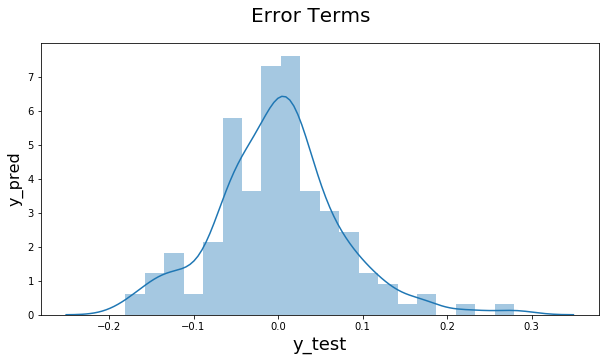

In [74]:
plt.figure(figsize=(10,5))
sns.distplot((y_train-y_train_price),bins=20)
plt.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)
plt.show()


# 7. Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [75]:
varlist=['price','peakrpm','horsepower','compressionratio','stroke','boreratio','enginesize','curbweight','wheelbase','carLWratio','carWHratio','PWratio','HCmpgratio']
df_test[varlist]=scaler.transform(df_test[varlist])

### Dividing into x_test and y_test

In [76]:
y_test=df_test.pop('price')
x_test=df_test

In [77]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

import statsmodels.api as sm
x_test_new=x_test[x_train_new5.columns]

# Adding a constant variable 
x_test_new=sm.add_constant(x_test_new)

In [78]:
# Making predictions
y_pred=lr5.predict(x_test_new)

# 8. Model Evaluation

Text(0, 0.5, 'y_pred')

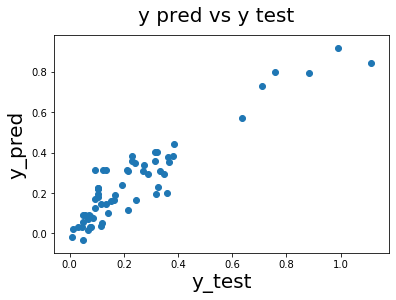

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y pred vs y test',fontsize=20)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('y_pred',fontsize=20)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.007549977788404056
r_square_value : 0.8587422427648711


### Final inference

#### We can see that the equation of our best fitted line is:

$ price = 0.259  \times  wheelbase + 0.66  \times  enginesize - 0.202 \times stroke + 0.127 \times PWratio + 0.082 \times enginetype_ohc - 0.1044 \times enginetype_ohcv - 0.229 \times cylindernumber_five - 0.29 \times cylindernumber_four+ 0.268 \times enginelocation_rear-0.243 \times cylindernumber_six $

With a low p-value and low VIF, below variables do describe the price of the automobiles to a good extent.<br>

wheelbase<br>
enginesize<br>
PW ratio<br>
enginetype_ohc<br>
enginelocation_rear<br>
cylindernumber_five<br>

R squared for train model is : 0.88 <br>
R squared for test model is : 0.86 <br>
since there is only difference of 0.02 between test and train model so overall it is a decent model.

To make the model even better we have a couple of options:<br>

1)Add new features <br>
2)choosing another set of variables to get a more normal distribution of error terms<br>
3)Build a non-linear model<br>